# Simple pendulum using Lagrange's equation

Defines a LagrangianPendulum class that is used to generate basic pendulum plots from solving Lagrange's equations.

* Last revised 17-Mar-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

## Euler-Lagrange equation

For a Double pendulum, the Lagrangian with generalized coordinate $\phi_1$ & $\phi_2$ is

$\begin{align}
  \mathcal{L} = \frac12 (m_1 + m_2) L_1^2 \dot\phi_1^2 + m_2 L_2 L_1 \dot\phi_1 \dot\phi_2 \cos(\phi_1 - \phi_2) 
  + \frac12 m_2 L_2^2 \dot\phi_2^2 - (m_1 + m_2) g L_1 (1 - \cos\phi_1) - m_2 g L_2 (1 - \cos\phi_2)
\end{align}$


## Hamilton's equations

Because our generalized coordinates $\phi_1$ & $\phi_2$  are indepedent with respect to time, $\mathcal{H}$ is simply $T + V$.

The Corresponding Hamiltonian is given as

$\begin{align}
  \mathcal{H} = \frac12 (m_1 + m_2) L_1^2 \dot\phi_1^2 + m_2 L_2 L_1 \dot\phi_1 \dot\phi_2 \cos(\phi_1 - \phi_2) 
  + \frac12 m_2 L_2^2 \dot\phi_2^2 + (m_1 + m_2) g L_1 (1 - \cos\phi_1) + m_2 g L_2 (1 - \cos\phi_2)
\end{align}$

The generalized momentum corresponding to $\phi_1$ & $\phi_2$ are

$\begin{align}
   \frac{\partial\mathcal{L}}{\partial \dot\phi_1} = (m_1 + m_2) L_1^2 \dot\phi_1 + m_2 L_1 L_2 \dot\phi_2 \cos(\phi_1 - \phi_2)  \equiv p_{\phi_1}
   \;.
\end{align}$

$\begin{align}
   \frac{\partial\mathcal{L}}{\partial \dot\phi_2} =  m_2 L_1 L_2 \dot\phi_1 \cos(\phi_1 - \phi_2) + m_2L_2^2 \dot\phi_2   \equiv p_{\phi_2}
   \;.
\end{align}$

We can invert this equation to find $\dot\phi_1$ & $\dot\phi_2$ and solve for Hamilton's equations.
  
  Hamilton's equations are
  
$\begin{align}
  \dot\phi_1 &= \frac{\partial\mathcal{H}}{\partial p_{\phi_1}} = \frac{p_{\phi_1} L_2 - p_{\phi_1} L_1 \cos(\phi_1 - \phi_2)}{(L_1^2 L_2)((m_1 + m_2) - m_2 \cos^2(\phi_1 - \phi_2))} \\
  \dot p_{\phi_1} &= -\frac{\partial\mathcal{H}}{\partial \phi_1} = -[m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \sin(\phi_1 - \phi_2) + (m_1 + m_2) g L_1 \sin\phi_1] 
  \;.
\end{align}$

$\begin{align}
\dot\phi_2 &= \frac{\partial\mathcal{H}}{\partial p_{\phi_2}} = \frac{(m_1 + m_2) p_{\phi_2} L_1^2 - m_2 L_1 L_2 p_{\phi_1} \cos(\phi_1 - \phi_2)}{(m_1 + m_2) L_1^2 L_2^2 m_2 - m_2^2 L_1^2 L_2^2 \cos^2(\phi_1 - \phi_2))} \\
\dot p_{\phi_2} &= -\frac{\partial\mathcal{H}}{\partial \phi_2} = -[m_2 g L_2 \sin\phi_2 - m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \sin(\phi_1 - \phi_2)]
\;.
\end{align}$




In [68]:
%matplotlib inline

In [69]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [70]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [71]:
class HamiltonianDoublePendulum():
    """
    Pendulum class implements the parameters and Hamiltons equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L : float
        length of the simple pendulum
    g : float
        gravitational acceleration at the earth's surface
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    mass : float
        mass of pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L_1, mass_1,mass_2,L_2, g
                ):
        self.L_1 = L_1
        self.L_2 = L_2
        self.g = g
        self.mass_1 = mass_1
        self.mass_2 = mass_2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt dp_phi/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi_1(t) , y[1] = p_phi_1, y[2] = phi_2(t), y[3] = p_phi_2(t)
            
        Returns
        -------
        
        """
        phi_dot_1 = (y[1]*self.L_2 - y[3]*self.L_1*np.cos(y[0] -y[2]))/\
                    (self.L_1**2*self.L_2*((self.mass_1 + self.mass_2) - self.mass_2*np.cos(y[0]-y[2])**2))
        phi_dot_2 = ((self.mass_1 + self.mass_2)*self.L_1**2 * y[3] - self.mass_2*self.L_1*self.L_2*y[1]*np.cos(y[0]-y[2]))/\
                    ((self.mass_1 + self.mass_2)*self.mass_2*(self.L_1*self.L_2)**2 - (self.mass_2*self.L_1*self.L_2*np.cos(y[0]-y[2]))**2)   
        p_phi_dot_2 = -1.*(self.mass_2*self.g*self.L_2*np.sin(y[2]) - \
                           self.mass_2*self.L_1*self.L_2*phi_dot_1*phi_dot_2*np.sin(y[0] -y[2]) ) 
        p_phi_dot_1 = -1.*(self.mass_2*self.L_1*self.L_2*phi_dot_1*phi_dot_2*np.sin(y[0]-y[2]) + \
                           (self.mass_1+self.mass_2)*self.g*self.L_1*np.sin(y[0]) )
        return [phi_dot_1, p_phi_dot_1,phi_dot_2,p_phi_dot_2]
    
    def solve_ode(self, t_pts, phi_0_1, p_phi_0_1,phi_0_2,p_phi_0_2, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0_1, p_phi_0_1,phi_0_2,p_phi_0_2] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, p_phi_1,phi_2,p_phi_2 = solution.y

        return phi_1, p_phi_1,phi_2,p_phi_2

In [72]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [73]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plots 

In [74]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
p_phi_vs_time_labels = (r'$t$', r'$p_\phi$')
phase_space_labels = (r'$\phi$', r'$p_\phi$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L_1 = 1.
L_2 = 1.
g = 1.
mass_1 = 1.
mass_2 = 1.

# Instantiate a pendulum 
p1 = HamiltonianDoublePendulum(L_1=L_1,L_2 = L_2, g=g, mass_1=mass_1, mass_2 = mass_2)


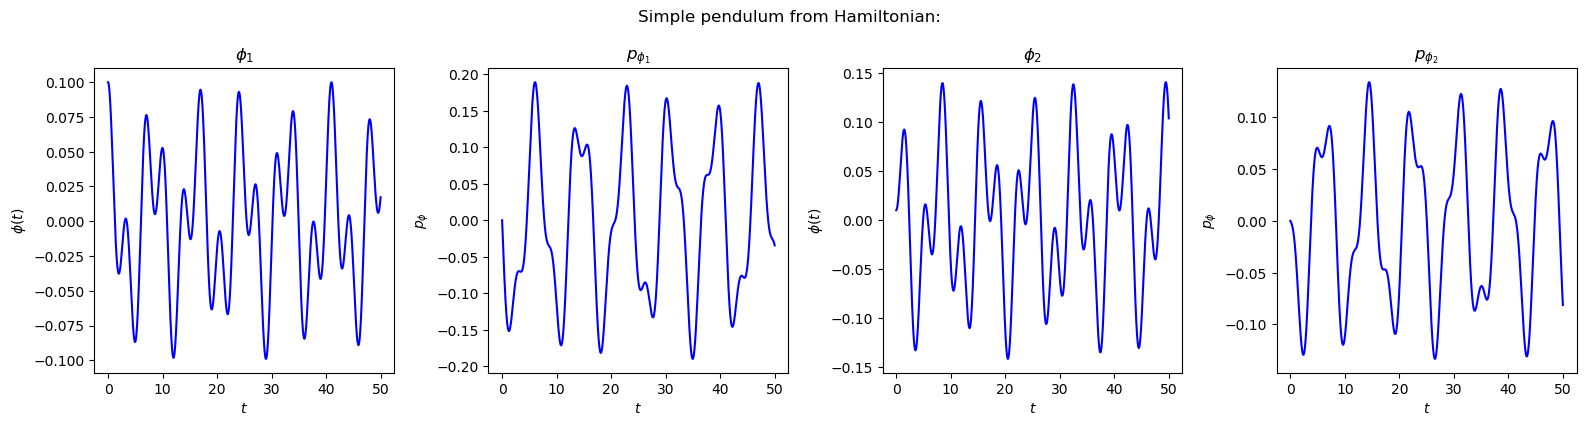

In [75]:
# both plots:  Initial conditions (small angle approximation)
phi_0_1 = 0.1
p_phi_0_1 = 0.
phi_0_2 = 0.01
p_phi_0_2 = 0.
phi_1, p_phi_1,phi_2,p_phi_2 = p1.solve_ode(t_pts, phi_0_1, p_phi_0_1,phi_0_2,p_phi_0_2)


# start the plot!
fig = plt.figure(figsize=(16,4))
overall_title = 'Simple pendulum from Hamiltonian:  ' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi_1 plot 
ax_a = fig.add_subplot(1,4,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_1$', 
            ax=ax_a)    
                              
# second plot: phi_dot_1 plot 
ax_b = fig.add_subplot(1,4,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi_1[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$p_{\phi_1}$', 
            ax=ax_b)    

# third plot: # first plot: phi_2 plot 
ax_c = fig.add_subplot(1,4,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_2$', 
            ax=ax_c)    


# Fourth plot: phi_dot_2 plot 
ax_d = fig.add_subplot(1,4,4) 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p_phi_2[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$p_{\phi_2}$', 
            ax=ax_d)    

fig.tight_layout()


Now let us plot phi_1(t) and phi_2(t) on the same plot as a function of time.

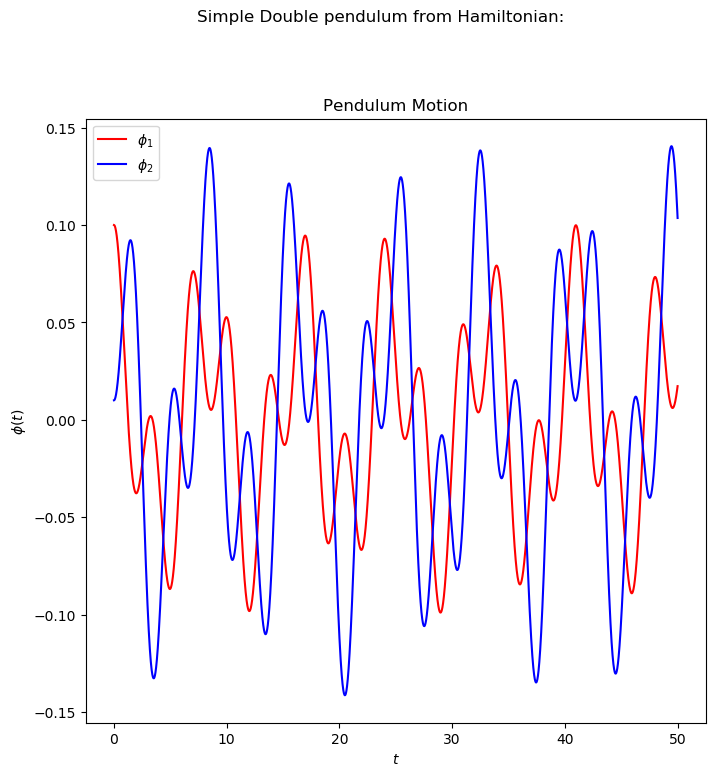

In [76]:
# start the plot!
fig_1 = plt.figure(figsize=(8,8))
overall_title = 'Simple Double pendulum from Hamiltonian:  ' + \
                '\n'     # \n means a new line (adds some space here)
fig_1.suptitle(overall_title, va='baseline')

ax_a = fig_1.add_subplot(1,1,1)  


start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label='$\phi_1$', 
            title='Pendulum Motion', 
            ax=ax_a)    

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label='$\phi_2$', 
            title='Pendulum Motion', 
            ax=ax_a)    

fig.savefig('Double Pendulum from Hamiltonian.png', bboxinches = 'tight')

Now let us test for chaotic motion by understanding how sensitive to inital conditions our double pendulum system is.

In [77]:
# both plots:  Initial conditions (small angle approximation)
phi_0_1_1 = np.pi/2.
p_phi_0_1_1 = 0.
phi_0_2_1 = np.pi
p_phi_0_2_1 = 0.
phi_1_1, p_phi_1_1,phi_2_1,p_phi_2_1 = p1.solve_ode(t_pts, phi_0_1_1, p_phi_0_1_1,phi_0_2_1,p_phi_0_2_1)

phi_0_1_2 = np.pi/2.
p_phi_0_1_2 = 0.
phi_0_2_2 = np.pi + 0.0001
p_phi_0_2_2 = 0.
phi_1_2, p_phi_1_2,phi_2_2,p_phi_2_2 = p1.solve_ode(t_pts, phi_0_1_2, p_phi_0_1_2,phi_0_2_2,p_phi_0_2_2)
# Now let us make a plot of the absolute value of the difference in motions of the first pendulum (phi_1)
# For each of the seperate solved motions
delta_phi = abs(phi_1_1 - phi_1_2)

(1e-09, 10.0)

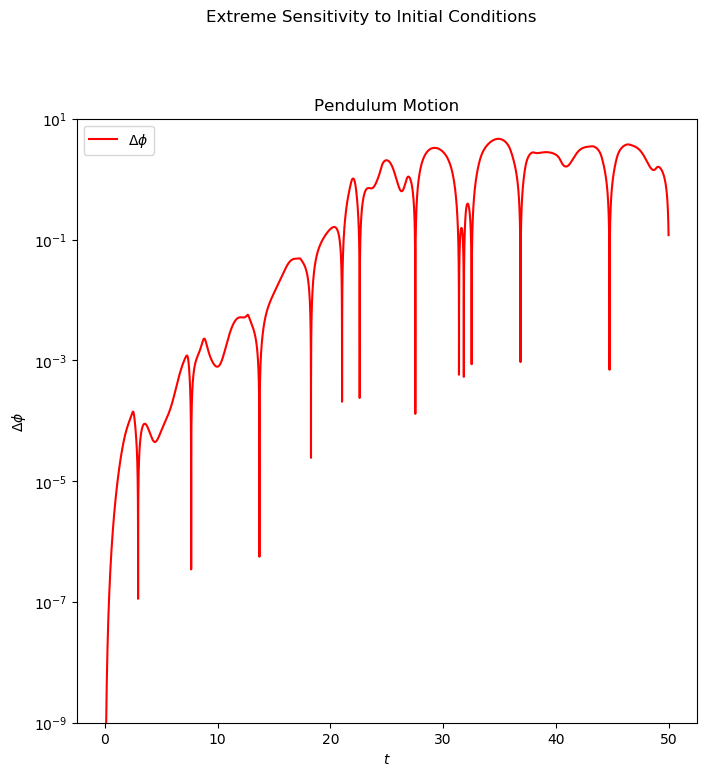

In [80]:
# Now lets make plots like we did in Chapter 12!
fig_1 = plt.figure(figsize=(8,8))
overall_title = 'Extreme Sensitivity to Initial Conditions  ' + \
                '\n'     # \n means a new line (adds some space here)
fig_1.suptitle(overall_title, va='baseline')

ax_a = fig_1.add_subplot(1,1,1)  


start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], delta_phi[start : stop], 
            axis_labels=(r'$t$', r'$\Delta\phi$'), 
            color='red',
            label='$\Delta\phi$', 
            title='Pendulum Motion',semilogy =True, 
            ax=ax_a) 
ax_a.set_ylim(1e-9,10.)